
<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Taller guiado de correlación**

Este taller guiado tiene como objetivo hacer un acercamiento práctico al análisis de correlaciones y una introducción al análisis de regresión.

En este taller guiado veremos como:



## **1. Instalar e importar los paquetes necesarios**

In [21]:
!pip install scipy

In [22]:
from scipy import stats
import scipy

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.11.12
NumPy 2.0.2
Pandas 2.2.2
Matplotlib 3.10.0
Seaborn 0.13.2


## **2. Cargar datos**

Para este taller vamos a utilizar algunos datos sintéticos pero también los datasets que ya conocen como el dataset Iris y el dataset housepricing, para mayor información consulte:

* https://www.kaggle.com/ashydv/housing-dataset

* https://archive.ics.uci.edu/ml/datasets/Iris

In [25]:
variables = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names= variables)

In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
housing = pd.read_csv("https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/Housing.csv")

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## **3. Análisis de correlación**

Este es un tipo de análisis estadístico usado para medir la fortaleza de relaciones entre dos variables y medir su grado de asociación. Esto se logra calculando coeficientes de correlación que permiten cuantificar el grado de asociación entre dos variables.

### **3.1 Coeficientes de correlación**

Los coeficientes toman valores entre -1.0 y 1.0. Toman valores positivos cuando las variables son directamente proporcionales, y valores negativos cuando la relación entre las variables es inversamente proporcional. La fortaleza de la correlación se incrementa hacía los extremos -1.0 y 1.0, y es más débil cuando se acerca a 0.

Existen 3 tipos de coeficientes de correlación

* **Coeficiente de correlación $r$ de Pearson**: Mide de la dirección y la fuerza de la **relación lineal** entre dos variables.
* **Coeficientes de correlación $\rho$ de Spearman**: Mide la dirección y fuerza de la asociación monotónica entre dos variables.
* **Coeficiente de correlación $\tau$ de Kendall**:
Mide la dirección y fuerza de la asociación monotónica entre dos variables. Además, puede medir la similitud entre dos conjuntos de rankings otorgados a un mismo conjunto de objetos.

### Con Pandas...

Se puede hacer análisis de correlación empleando pandas, numpy o scipy. Empezaremos con los métodos más básicos usando pandas.

* `pd.Series.corr`: Permite calcular el coeficiente de correlación de una serie con otra.
* `pd.DataFrame.corrwith`: Calula correlación entre las filas o columnas de un DataFrame contra las filas o columnas de una Series u otro DataFrame.

* `pd.Dataframe.corr`: Calcula la matriz de correlación entre las columnas de un DataFrame.

Todos estos métodos pueden trabajar con los métodos `'pearson', 'kendall', 'spearman'`, por defecto si no se epecífica se trabaja con pearson.



Primero vamos a crear algunos datos de ejemplo para trabajar.



In [29]:
# Create a DataFrame with positive linear correlation
np.random.seed(0)
positive_corr_df = pd.DataFrame({
    'X_1': np.random.randint(0, 100, 100),  # Random X values
    'Y_1': np.random.randint(0, 100, 100),  # Random Y values
})

# Add positive linear correlation by adding some noise to Y based on X
positive_corr_df['Y_1'] = positive_corr_df['X_1'] + np.random.normal(0, 10, 100)

# Create a DataFrame with negative linear correlation
negative_corr_df = pd.DataFrame({
    'X_2': np.random.randint(0, 100, 100),  # Random X values
    'Y_2': np.random.randint(0, 100, 100),  # Random Y values
})

# Add negative linear correlation by subtracting some noise from Y based on X
negative_corr_df['Y_2'] = negative_corr_df['X_2'] * -1 #- np.random.normal(0, 10, 100)

# Create a DataFrame with neutral correlation
neutral_corr_df = pd.DataFrame({
    'X_3': np.random.randint(0, 100, 100),  # Random X values
    'Y_3': np.random.randint(0, 100, 100),  # Random Y values
})

# Create a DataFrame with a negative non-linear correlation
negative_nonlinear_df = pd.DataFrame({
    'X_4': np.random.randint(0, 100, 100),  # Random X values
    'Y_4': np.random.randint(0, 100, 100),  # Random Y values
})

# Add negative non-linear correlation by squaring X and subtracting from Y
negative_nonlinear_df['Y_4'] = negative_nonlinear_df['Y_4'] - negative_nonlinear_df['X_4'] ** 2

# Create a DataFrame with a positive non-linear correlation
positive_nonlinear_df = pd.DataFrame({
    'X_5': np.random.randint(0, 100, 100),  # Random X values
    'Y_5': np.random.randint(0, 100, 100),  # Random Y values
})

# Add positive non-linear correlation by taking the square root of X and adding to Y
positive_nonlinear_df['Y_5'] = np.power(positive_nonlinear_df['X_5'] ,2) #np.power(positive_nonlinear_df['Y_5'])

# Combine all dataframes into a single dataframe
combined_df = (positive_corr_df
               .merge(negative_corr_df, left_index=True, right_index=True)
               .merge(neutral_corr_df, left_index=True, right_index=True)
               .merge(negative_nonlinear_df, left_index=True, right_index=True)
               .merge(positive_nonlinear_df, left_index=True, right_index=True)
               )
# combined_df = pd.concat([
#     positive_corr_df.assign(Correlation='Positive Linear'),
#     negative_corr_df.assign(Correlation='Negative Linear'),
#     neutral_corr_df.assign(Correlation='Neutral Linear'),
#     negative_nonlinear_df.assign(Correlation='Negative Non-Linear'),
#     positive_nonlinear_df.assign(Correlation='Positive Non-Linear')
# ], ignore_index=True)

# Display the combined dataframe
combined_df.head()

,X_1,Y_1,X_2,Y_2,X_3,Y_3,X_4,Y_4,X_5,Y_5
0,44,34.077425,26,-26,7,18,33,-991,38,1444
1,47,57.112853,35,-35,92,97,23,-499,35,1225
2,64,78.004401,58,-58,65,78,12,-64,88,7744
3,67,60.450083,49,-49,41,7,5,2,49,2401
4,67,64.442093,73,-73,66,53,38,-1397,79,6241


In [30]:
# Esta función nos va a ayudar a ahorrar código
# Va a graficar la relación entre un par de variables presentes en el mismo dataframe
# También va a calcular el coeficiente de correlación de pearson y va a mostrarlo

def graficar_correlacion(df, var_a, var_b, method):

  coef = df[var_a].corr(df[var_b], method=method); # Calcula el coeficiente de correlacion

  fig, axes = plt.subplots(dpi = 110);

  sns.scatterplot(data = df,
                  x = var_a, y = var_b,

                  ax = axes,
                  marker='o',
                  linestyle='None',
                  s = 50,  # tamaño de los puntos
                  alpha = 0.5,  # grado de transparencia
                  );

  axes.set_title(f"Coeficiente de correlación, {method}: {coef:.2}") # titulo con formateo de string

Veremos algunos casos que se pueden presentar en el análisis de correlación.

In [31]:
combined_df.head(2)

,X_1,Y_1,X_2,Y_2,X_3,Y_3,X_4,Y_4,X_5,Y_5
0,44,34.077425,26,-26,7,18,33,-991,38,1444
1,47,57.112853,35,-35,92,97,23,-499,35,1225


In [32]:
combined_df.shape

(100, 10)

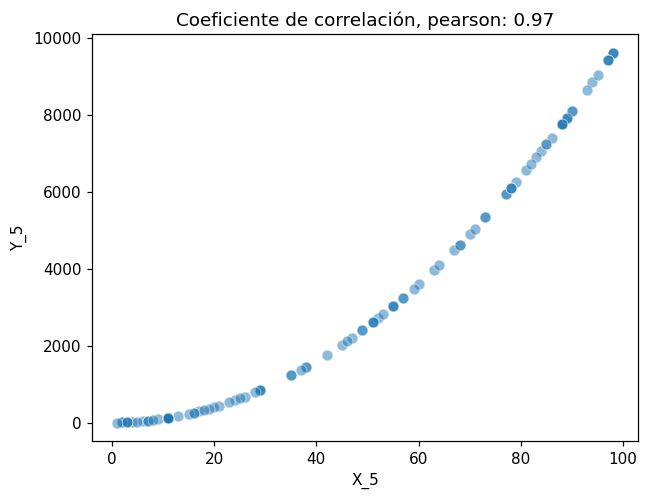

In [33]:
# Es valioso y además recomendado acompañar el cálculo de coeficientes de correlación con visualización

graficar_correlacion(combined_df, 'X_5', 'Y_5', 'pearson')

In [34]:
# Correlación perfecta positiva - relación directa, entre v1 y v1
# pd.Series.corr(otra_serie)

r = combined_df['X_2'].corr(combined_df['Y_1'], method='pearson')
r

np.float64(-0.018692527154018312)

### Matriz de confusión

Este método es muy valioso porque permite evaluar la correlación entre cada par de variables presentes en el dataset. La matriz obtenida es simétrica ya que el coeficiente de correlación no depende del orden.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [35]:
# pd.DataFrame(method=['pearson', 'spearman', 'kendall'])

a = combined_df.corr(method='pearson')
a

,X_1,Y_1,X_2,Y_2,X_3,Y_3,X_4,Y_4,X_5,Y_5
X_1,1.000000,0.945633,-0.050011,0.050011,0.111769,-0.053716,0.068144,-0.060377,0.192467,0.178040
Y_1,0.945633,1.000000,-0.018693,0.018693,0.071846,-0.033774,0.084587,-0.067249,0.160093,0.151643
X_2,-0.050011,-0.018693,1.000000,-1.000000,0.043679,0.106553,0.178073,-0.162627,-0.080689,-0.076122
Y_2,0.050011,0.018693,-1.000000,1.000000,-0.043679,-0.106553,-0.178073,0.162627,0.080689,0.076122
X_3,0.111769,0.071846,0.043679,-0.043679,1.000000,0.109657,0.092621,-0.086299,-0.091542,-0.066591
Y_3,-0.053716,-0.033774,0.106553,-0.106553,0.109657,1.000000,0.051473,-0.103767,-0.070996,-0.036846
X_4,0.068144,0.084587,0.178073,-0.178073,0.092621,0.051473,1.000000,-0.970169,0.011444,-0.010431
Y_4,-0.060377,-0.067249,-0.162627,0.162627,-0.086299,-0.103767,-0.970169,1.000000,-0.027807,-0.000284
X_5,0.192467,0.160093,-0.080689,0.080689,-0.091542,-0.070996,0.011444,-0.027807,1.000000,0.971724
Y_5,0.178040,0.151643,-0.076122,0.076122,-0.066591,-0.036846,-0.010431,-0.000284,0.971724,1.000000


In [36]:
#  pd.DataFrame(serie, method=['pearson', 'spearman', 'kendall'])
(combined_df
 .corrwith(combined_df['X_1'] , method='spearman')
 .reset_index()
 .rename(columns={'index':'variable', 0:'X_1'})
 .sort_values(by='X_1', ascending=False)
 )

,variable,X_1
0,X_1,1.000000
1,Y_1,0.951855
8,X_5,0.183369
9,Y_5,0.183369
4,X_3,0.107527
6,X_4,0.068006
3,Y_2,0.056244
5,Y_3,-0.043210
2,X_2,-0.056244
7,Y_4,-0.066166


In [37]:
metodos = ['pearson', 'spearman', 'kendall']
mi_lista = []

for m in metodos:
  c = np.round(combined_df['Y_4'].corr(combined_df['X_4'], method=m),4)
  mi_lista.append([m , c])
  print(m , c)

(pd.DataFrame(mi_lista, columns=['metodo','coeficiente'])
.sort_values(by='coeficiente', ascending=True)
)

pearson -0.9702
spearman -0.9966
kendall -0.9744


,metodo,coeficiente
1,spearman,-0.9966
2,kendall,-0.9744
0,pearson,-0.9702


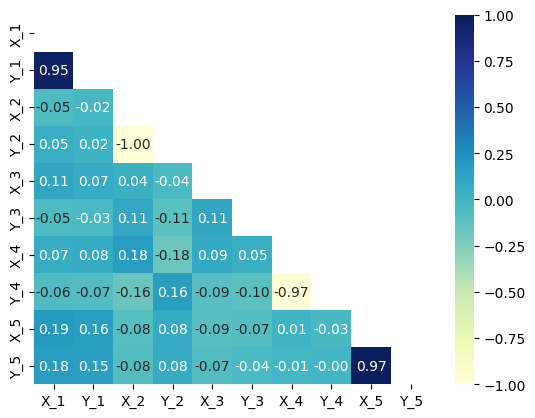

In [38]:
a = combined_df.corr(method='pearson')
a

mask = np.triu(a)
mask

sns.heatmap(data = a,
            vmin = -1,
            vmax = 1,
            center = 0,
            annot = True,
            cmap="YlGnBu",
            mask=mask,
            fmt='.2f' # la cantidad de números flotantes a la izquierda / decimales
            )
plt.show()

In [39]:
ej = combined_df.corrwith(combined_df['X_1'], method='spearman').reset_index().rename(columns={'index':'variable', 0:'X_1'})
ej['corr_abs'] = ej['X_1'].abs()
ej.sort_values(by='corr_abs', ascending=False)

,variable,X_1,corr_abs
0,X_1,1.000000,1.000000
1,Y_1,0.951855,0.951855
8,X_5,0.183369,0.183369
9,Y_5,0.183369,0.183369
4,X_3,0.107527,0.107527
6,X_4,0.068006,0.068006
7,Y_4,-0.066166,0.066166
2,X_2,-0.056244,0.056244
3,Y_2,0.056244,0.056244
5,Y_3,-0.043210,0.043210


### **Ejercicio Housing**:

In [40]:
housing.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [42]:
# Exploramos estadísticas
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [43]:
# ['int', 'float']
# "number"
housing.select_dtypes('number').corr(method='pearson').sort_values(by='price', ascending=False)
# housing.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270


In [44]:
# housing['bathrooms_area'] = np.round(housing['area']/housing['bathrooms'],4)
# housing.head(2)

In [45]:
# housing.select_dtypes('number').corr(method='pearson')

In [46]:
housing.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [47]:
housing_2 = housing.replace({'yes':1, 'no':0})

housing_2 = housing_2.replace({'furnished':3,
                               'semi-furnished':2,
                               'unfurnished':1})
housing_2.head(2)

<ipython-input-47-8603ad49e4ff>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_2 = housing.replace({'yes':1, 'no':0})
<ipython-input-47-8603ad49e4ff>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_2 = housing_2.replace({'furnished':3,


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3


In [48]:
housing_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [49]:
df_housing_corr_sample = (housing_2
                      .select_dtypes(['int', 'float']) #'number'
                      .corrwith(housing_2['price'], method='pearson')
                      .sort_values(ascending = [False])
                      .reset_index()
                      )

df_housing_corr_sample['corr_abs'] = np.abs(df_housing_corr_sample[0])

threshold = 0.3
df_housing_corr_sample[(df_housing_corr_sample['corr_abs'] >= threshold) & (df_housing_corr_sample['corr_abs'] < 1)]

# df_housing_corr_sample

,index,0,corr_abs
1,area,0.535997,0.535997
2,bathrooms,0.517545,0.517545
3,airconditioning,0.452954,0.452954
4,stories,0.420712,0.420712
5,parking,0.384394,0.384394
6,bedrooms,0.366494,0.366494
7,prefarea,0.329777,0.329777
8,furnishingstatus,0.304721,0.304721


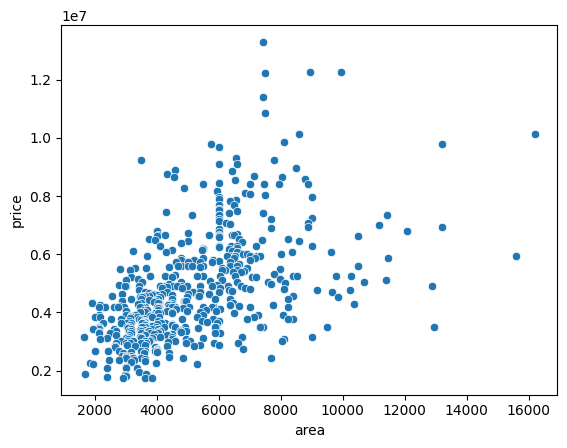

In [50]:
# sns.scatterplot(data=housing_2, x='airconditioning', y='price')
sns.scatterplot(data=housing_2, x='area', y='price')
plt.show()

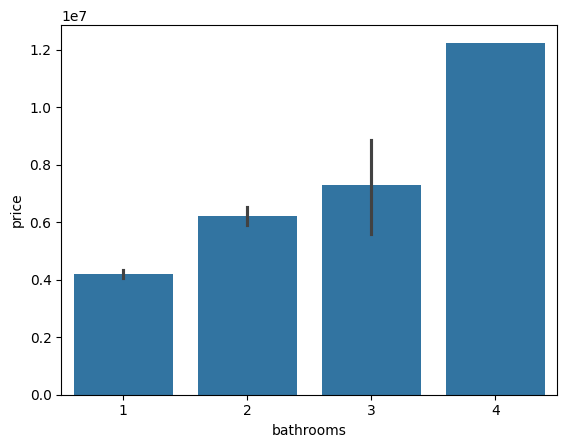

In [51]:
sns.barplot(data=housing_2, x='bathrooms', y='price')
plt.show()

In [52]:
housing_2['bathrooms'].value_counts()

,count
bathrooms,
1,401
2,133
3,10
4,1


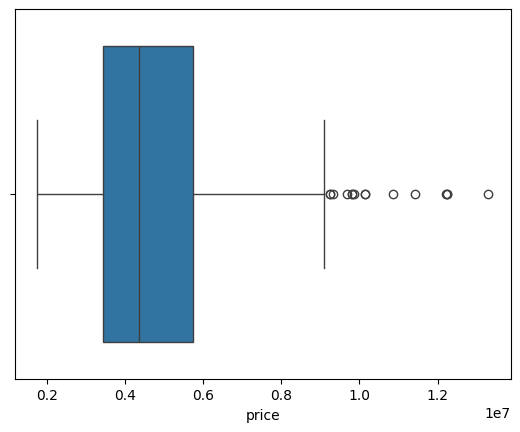

In [53]:
# sns.histplot(data=housing_2, x='price')
# plt.show()
sns.boxplot(data=housing_2, x='price')
plt.show()

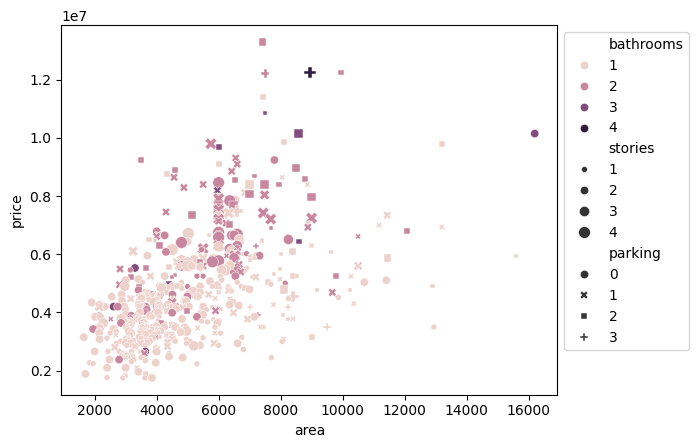

In [54]:
# Empezamos a graficar relaciones
# area               0.535997
# bathrooms          0.517545
# airconditioning    0.452954
# stories            0.420712
# parking            0.384394
# bedrooms           0.366494
# prefarea

ax = sns.scatterplot(data=housing_2,
                     x='area',
                     y='price',
                     hue='bathrooms',
                     size='stories', #stories #airconditioning
                     style='parking',
                     # palette="crest"
                     )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

In [55]:
housing_2['prefarea'].value_counts(normalize=True)

,proportion
prefarea,
0,0.765138
1,0.234862


In [56]:
housing_2.query('area > 12000 and bathrooms == 2')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
69,6790000,12090,4,2,2,1,0,0,0,0,2,1,3


In [57]:
housing_2[housing_2['area'] > 15000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,1
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,2


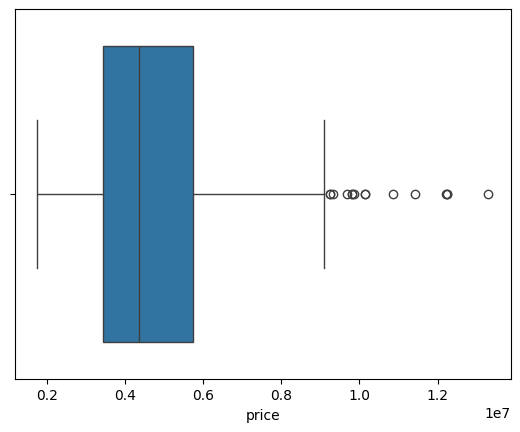

In [58]:
sns.boxplot(data=housing_2, x='price')
plt.show()

### **Ejercicio**:

* Calcule el coeficiente de correlación entre las variables área y precio del dataset housing. Elabore una grafica que le permita evaluar visualmente la relación entre estas variables.
* Calcule la matriz de correlación para las variables cuantitativas presentes en Iris

In [59]:
housing['area'].corr(housing['price'], method='pearson')

np.float64(0.5359973457780797)

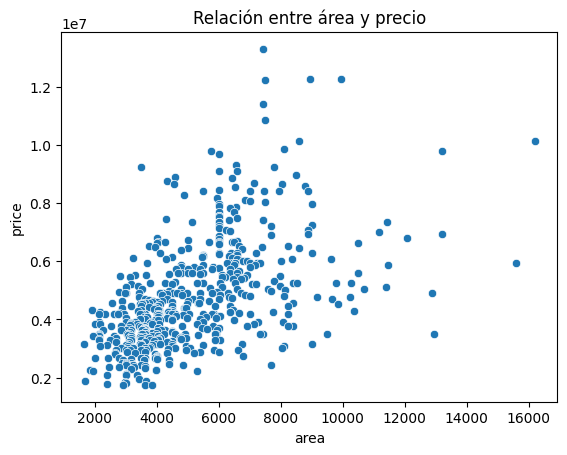

In [60]:
sns.scatterplot(
    data = housing,
    x = 'area',
    y = 'price'
)

plt.title('Relación entre área y precio')
plt.show()

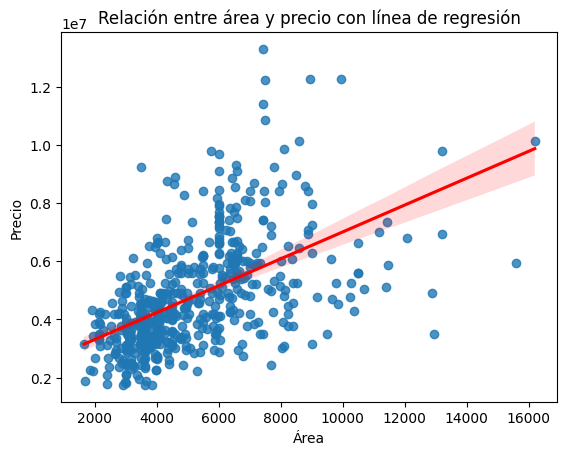

In [61]:
sns.regplot(
    data = housing,
    x = 'area',
    y = 'price',
    line_kws = {'color' : 'red'}
)

plt.title('Relación entre área y precio con línea de regresión')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.show()

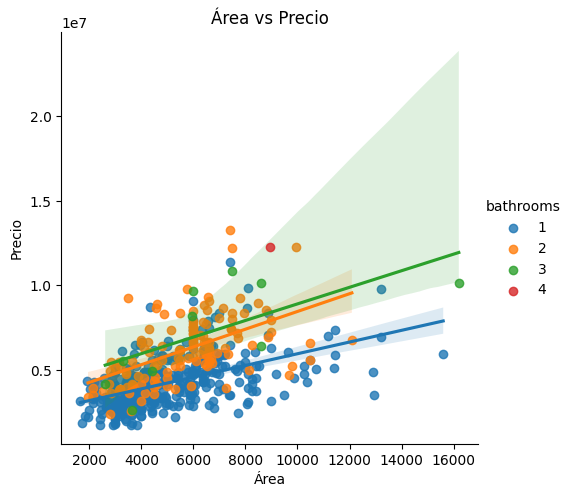

In [62]:
sns.lmplot(data=housing, x='area', y='price', hue='bathrooms')
plt.title('Área vs Precio')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.show()

In [63]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
iris.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [65]:
for specie in iris['species'].unique():
  print(f'Correlaciones para {specie}')
  print(iris[iris['species'] == specie].corr(numeric_only = True), '\n')

Correlaciones para Iris-setosa
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.746780      0.263874     0.279092
sepal_width       0.746780     1.000000      0.176695     0.279973
petal_length      0.263874     0.176695      1.000000     0.306308
petal_width       0.279092     0.279973      0.306308     1.000000 

Correlaciones para Iris-versicolor
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.525911      0.754049     0.546461
sepal_width       0.525911     1.000000      0.560522     0.663999
petal_length      0.754049     0.560522      1.000000     0.786668
petal_width       0.546461     0.663999      0.786668     1.000000 

Correlaciones para Iris-virginica
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.457228      0.864225     0.281108
sepal_width       0.457228     1.000000      0.401045     0.537728
petal_length      0.86422

### Con Scipy

Ahora, pasando a la librería Scipy. Es importante a la hora de reportar coeficientes de correlación soportar las conclusiones con la estadística inferencial, para establecer los niveles de significacia de las relaciones encontradas.

Para conocer el coeficiente de correlación y el p_value se pueden usar los siguientes métodos:

* [**`stats.pearsonr`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html): coeficiente de correlación $r$ de Pearson.
* [**`stats.spearmanr`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html): coeficiente de correlación $\rho$ de Spearman.
* [**`stats.kendalltau`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html): coeficiente de correlación $\tau$ de Kendall.

Estas funciones reciben como parámetros los arreglos **`x`** y **`y`**, y retornan:
* El coeficiente de correlación correspondiente.
* El **p-valor** para un test de hipótesis cuya hipótesis nula es que los datos no están correlacionados. Por lo tanto, si el **p-valor $\lt \alpha$** (nivel de significancia), esto quiere decir que la correlación es significativa. De lo contrario, la correlación puede deberse a la aleatoriedad de los datos, independientemente de su valor.

Generalmente se trabaja con un nivel de significancia $ \alpha=0.05$, entonces si el p-valor es menor a 0.05 se puede establecer que la correlación es significativa.

In [66]:
x = housing['price']
y = housing['area']

coef, p = stats.pearsonr(x, y)
print(coef,p)

0.5359973457780801 7.388225401521693e-42


### **Ejercicio**

Calcule el coeficiente de correlación de Pearson y el p-valor de las posibles combinaciones 6 combinaciones entre las variables cuantitativas del **dataset Iris**. Establezca la fortaleza de la correlación y determine si es o no significativa.

Para lo anterior declare una función que reciba dos arreglos `x` y `y` y retorne un mensaje con el coeficiente de correlación, el p valor y si la correlación es o no es significativa.

**Ejemplo:**
```
Input:
correlacion(x,y)

Output:
El coeficiente de correlación es: 0,869
El p-value es: 0.0048
La correlación es significativa
```

In [67]:
from scipy import stats
import pandas as pd
from itertools import combinations

# Cargar el dataset
variables = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=variables)

def correlacion(x, y, alpha = 0.05):
  coef, p = stats.pearsonr(x, y)

  fuerza = (
      'fuerte' if abs(coef) >= 0.7 else
      'moderada' if abs(coef) >= 0.3 else
      'débil'
  )

  significancia = 'significativa' if p < alpha else 'no significativa'

  print(f'Coeficiente de correlación: {coef:.3f}')
  print(f'p-value: {p:.4f}')
  print(f'La correlación es {fuerza} y {significancia} \n')


numericas = ['sepal_length','sepal_width','petal_length','petal_width']

print(f'Correlaciones para las 3 especies')
for v1, v2 in combinations(numericas, 2):
  print(f'{v1} vs {v2}')
  correlacion(iris[v1], iris[v2])


for specie in iris['species'].unique():
  print(f'Correlaciones para {specie}')

  subset = iris[iris['species'] == specie]

  for v1, v2 in combinations(numericas, 2):
    print(f'{v1} vs {v2}')
    correlacion(subset[v1], subset[v2])





Correlaciones para las 3 especies
sepal_length vs sepal_width
Coeficiente de correlación: -0.109
p-value: 0.1828
La correlación es débil y no significativa 

sepal_length vs petal_length
Coeficiente de correlación: 0.872
p-value: 0.0000
La correlación es fuerte y significativa 

sepal_length vs petal_width
Coeficiente de correlación: 0.818
p-value: 0.0000
La correlación es fuerte y significativa 

sepal_width vs petal_length
Coeficiente de correlación: -0.421
p-value: 0.0000
La correlación es moderada y significativa 

sepal_width vs petal_width
Coeficiente de correlación: -0.357
p-value: 0.0000
La correlación es moderada y significativa 

petal_length vs petal_width
Coeficiente de correlación: 0.963
p-value: 0.0000
La correlación es fuerte y significativa 

Correlaciones para Iris-setosa
sepal_length vs sepal_width
Coeficiente de correlación: 0.747
p-value: 0.0000
La correlación es fuerte y significativa 

sepal_length vs petal_length
Coeficiente de correlación: 0.264
p-value: 0.0641


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

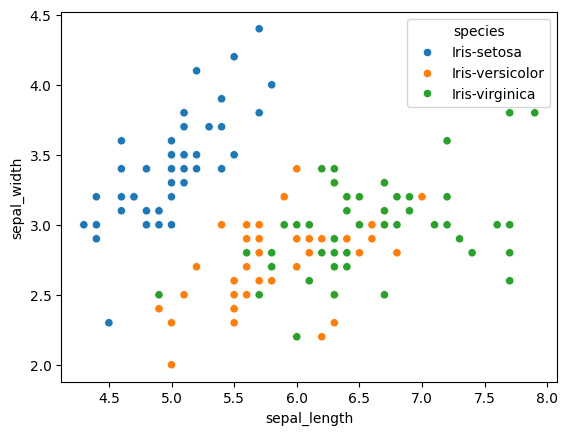

In [70]:
sns.scatterplot(
    data = iris,
    x = 'sepal_length',
    y = 'sepal_width',
    hue = 'species'
)

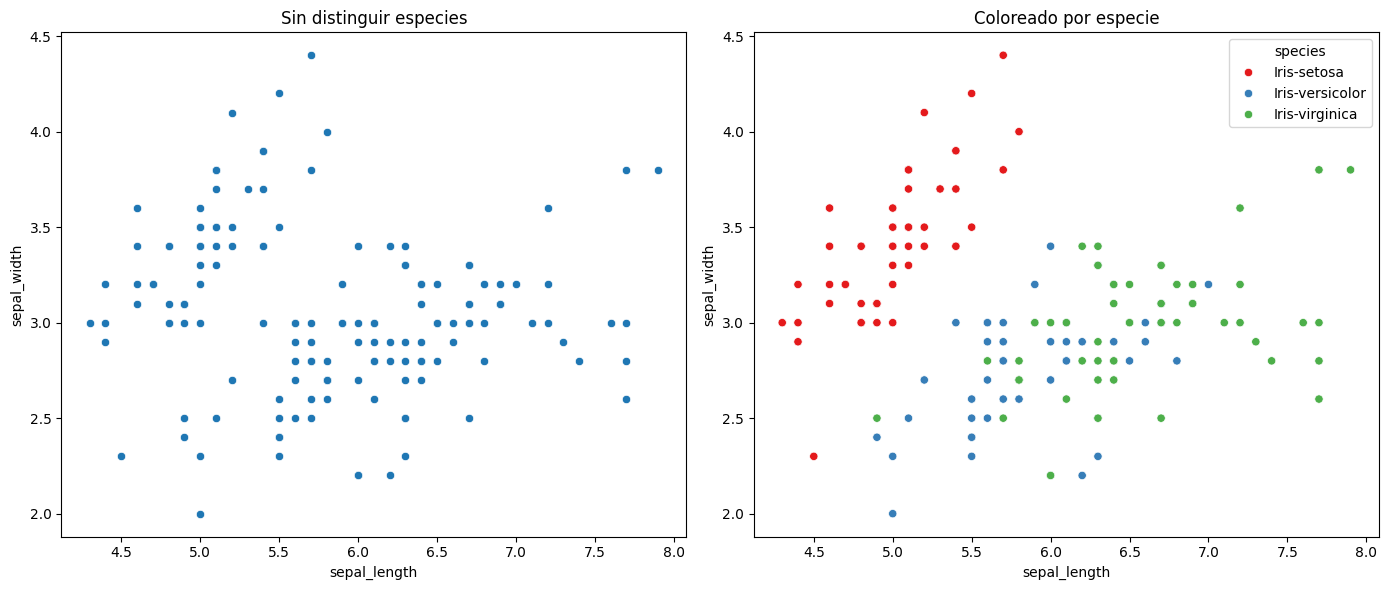

In [71]:
# Crear los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico sin distinguir especies
sns.scatterplot(
    data=iris,
    x='sepal_length',
    y='sepal_width',
    ax=axes[0]
)
axes[0].set_title('Sin distinguir especies')

# Gráfico con especies separadas por color
sns.scatterplot(
    data=iris,
    x='sepal_length',
    y='sepal_width',
    hue='species',
    palette='Set1',
    ax=axes[1]
)
axes[1].set_title('Coloreado por especie')

plt.tight_layout()
plt.show()

## **Recursos adicionales**

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*